In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv('/content/auto_mpg_without_nan.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,1970,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970,USA,ford torino


In [ ]:
encoder = LabelEncoder()
df['origin'] = encoder.fit_transform(df['origin'])

In [ ]:
df.drop(columns=['name'], inplace=True)

#Feature Selection


In [ ]:
# Corellation between features and the target col. or the output
# Corellation Matrix
cormtx = df.corr().abs().round(2)
cormtx

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,0.78,0.81,0.78,0.83,0.42,0.58,0.47
cylinders,0.78,1.00,0.95,0.84,0.90,0.50,0.35,0.56
displacement,0.81,0.95,1.00,0.90,0.93,0.54,0.37,0.59
horsepower,0.78,0.84,0.90,1.00,0.86,0.69,0.42,0.45
weight,0.83,0.90,0.93,0.86,1.00,0.42,0.31,0.52
acceleration,0.42,0.50,0.54,0.69,0.42,1.00,0.29,0.26
year,0.58,0.35,0.37,0.42,0.31,0.29,1.00,0.07
origin,0.47,0.56,0.59,0.45,0.52,0.26,0.07,1.00


In [ ]:
selected_features = cormtx[cormtx['mpg']>= 0.5]
selected_features

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,0.78,0.81,0.78,0.83,0.42,0.58,0.47
cylinders,0.78,1.00,0.95,0.84,0.90,0.50,0.35,0.56
displacement,0.81,0.95,1.00,0.90,0.93,0.54,0.37,0.59
horsepower,0.78,0.84,0.90,1.00,0.86,0.69,0.42,0.45
weight,0.83,0.90,0.93,0.86,1.00,0.42,0.31,0.52
year,0.58,0.35,0.37,0.42,0.31,0.29,1.00,0.07


In [ ]:
# Extract the indices of these selected features:
list_of_selected_features = list(selected_features.index)
list_of_selected_features

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'year']

In [ ]:
list_of_selected_features.remove('mpg') # removing element using its content
# list_of_selected_features.pop(0) # removing using element index
list_of_selected_features # 4 features

['cylinders', 'displacement', 'horsepower', 'weight', 'year']

In [ ]:
x = df.iloc[:,1:8]
y = df.iloc[:,0]
# another way for dividing dataframe into x, y
# x = df.drop(columns = ['mpg'])
# y = df['mpg']
x


,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,1970,2
1,8,350.0,165,3693,11.5,1970,2
2,8,318.0,150,3436,11.0,1970,2
3,8,304.0,150,3433,12.0,1970,2
4,8,302.0,140,3449,10.5,1970,2
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,1982,2
388,4,97.0,52,2130,24.6,1982,0
389,4,135.0,84,2295,11.6,1982,2
390,4,120.0,79,2625,18.6,1982,2


In [ ]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


In [ ]:
df_sel_feat = x[list_of_selected_features]
df_sel_feat

,cylinders,displacement,horsepower,weight,year
0,8,307.0,130,3504,1970
1,8,350.0,165,3693,1970
2,8,318.0,150,3436,1970
3,8,304.0,150,3433,1970
4,8,302.0,140,3449,1970
...,...,...,...,...,...
387,4,140.0,86,2790,1982
388,4,97.0,52,2130,1982
389,4,135.0,84,2295,1982
390,4,120.0,79,2625,1982


In [ ]:
x[['cylinders','weight']] ## pass a list ✔
x

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,1970,2
1,8,350.0,165,3693,11.5,1970,2
2,8,318.0,150,3436,11.0,1970,2
3,8,304.0,150,3433,12.0,1970,2
4,8,302.0,140,3449,10.5,1970,2
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,1982,2
388,4,97.0,52,2130,24.6,1982,0
389,4,135.0,84,2295,11.6,1982,2
390,4,120.0,79,2625,18.6,1982,2


In [ ]:
# eliminating redunduncy in features
# selecting one of two features which have strong correlation

In [ ]:
feat_corr = x.corr().abs().round(2)
feat_corr

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.00,0.95,0.84,0.90,0.50,0.35,0.56
displacement,0.95,1.00,0.90,0.93,0.54,0.37,0.59
horsepower,0.84,0.90,1.00,0.86,0.69,0.42,0.45
weight,0.90,0.93,0.86,1.00,0.42,0.31,0.52
acceleration,0.50,0.54,0.69,0.42,1.00,0.29,0.26
year,0.35,0.37,0.42,0.31,0.29,1.00,0.07
origin,0.56,0.59,0.45,0.52,0.26,0.07,1.00


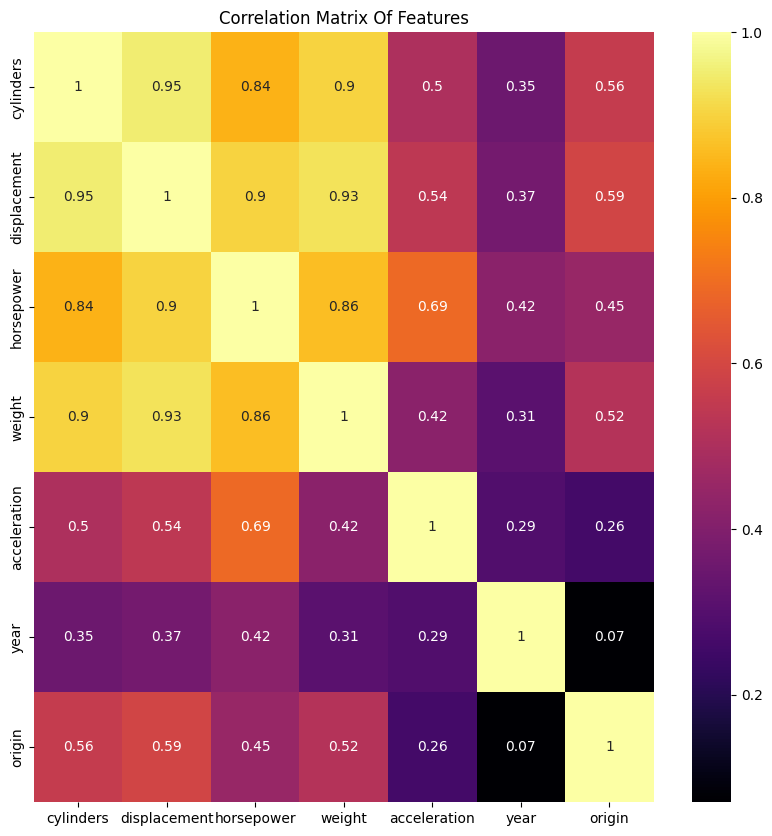

In [ ]:
# plotting the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(feat_corr, annot = True, cmap='inferno')
plt.title("Correlation Matrix Of Features")
plt.show()

In [ ]:
feat_corr.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [ ]:
corr_feat_list= []
x_corr = feat_corr
for i in range (len(x_corr.columns)):
  for j in range(i):
    if x_corr.iloc[i,j] > 0.8:
      corr_feat_list.append(x_corr.columns[i])
print(corr_feat_list)
print(set(corr_feat_list))


['displacement', 'horsepower', 'horsepower', 'weight', 'weight', 'weight']
{'weight', 'displacement', 'horsepower'}


In [ ]:
features_drop = set(corr_feat_list)

In [ ]:
x

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130,3504,12.0,1970,2
1,8,350.0,165,3693,11.5,1970,2
2,8,318.0,150,3436,11.0,1970,2
3,8,304.0,150,3433,12.0,1970,2
4,8,302.0,140,3449,10.5,1970,2
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,1982,2
388,4,97.0,52,2130,24.6,1982,0
389,4,135.0,84,2295,11.6,1982,2
390,4,120.0,79,2625,18.6,1982,2


In [ ]:
selected_feat = x.drop(columns = features_drop)
selected_feat

,cylinders,acceleration,year,origin
0,8,12.0,1970,2
1,8,11.5,1970,2
2,8,11.0,1970,2
3,8,12.0,1970,2
4,8,10.5,1970,2
...,...,...,...,...
387,4,15.6,1982,2
388,4,24.6,1982,0
389,4,11.6,1982,2
390,4,18.6,1982,2


In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df_sel_feat) # 1
x_scaled_2 = scaler.fit_transform(selected_feat) # 2

In [ ]:
x_scaled

array([[1.        , 0.61757106, 0.45652174, 0.5361497 , 0.        ],
       [1.        , 0.72868217, 0.64673913, 0.58973632, 0.        ],
       [1.        , 0.64599483, 0.56521739, 0.51686986, 0.        ],
       ...,
       [0.2       , 0.17312661, 0.20652174, 0.19336547, 1.        ],
       [0.2       , 0.13436693, 0.17934783, 0.2869294 , 1.        ],
       [0.2       , 0.13178295, 0.19565217, 0.31386447, 1.        ]])

In [ ]:
x_scaled_2

array([[1.        , 0.23809524, 0.        , 1.        ],
       [1.        , 0.20833333, 0.        , 1.        ],
       [1.        , 0.17857143, 0.        , 1.        ],
       ...,
       [0.2       , 0.21428571, 1.        , 1.        ],
       [0.2       , 0.63095238, 1.        , 1.        ],
       [0.2       , 0.67857143, 1.        , 1.        ]])

In [ ]:
#preparing model
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y,test_size=0.2, random_state=42)

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(x_scaled_2,y,test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test,y_pred))

0.7931645680840781


In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(r2_score(Y_test,Y_pred))

0.7089461641644806
